### Сведения о проекте

В данном исследовании проводится маркетинговый анализ причин убытков приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

В рамках исследования будет изучено откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
print(visits.isna().sum()) #проверка наличия пропусков

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


In [6]:
#корректировка названий столбцов в соответствии с принятыми стандартами

visits.columns = map(str.lower, visits.columns)
visits = visits.rename(columns={'user id' : 'user_id', 'session start':'session_start', 'session end':'session_end'})
print(visits.head(10))

        user_id         region   device         channel        session_start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54

In [7]:
visits.duplicated().sum() #проверка наличия дубликатов

0

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
print(orders.isna().sum()) #проверка наличия пропусков

User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [10]:
#корректировка названий столбцов в соответствии с принятыми стандартами

orders.columns = map(str.lower, orders.columns)
orders = orders.rename(columns={'user id' : 'user_id', 'event dt':'event_dt'})
print(orders.head(10))

        user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99


In [11]:
orders.duplicated().sum() #проверка наличия дубликатов

0

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
print(costs.isna().sum()) #проверка наличия пропусков

dt         0
Channel    0
costs      0
dtype: int64


In [14]:
#корректировка названий столбцов в соответствии с принятыми стандартами

costs.columns = map(str.lower, costs.columns)
print(costs.head(10))

           dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5


In [15]:
costs.duplicated().sum() #проверка наличия дубликатов

0

In [16]:
#преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<div class="alert alert"> <b>функция для создания профилей пользователей</b>

In [17]:
# функция get_profiles() — для создания профилей пользователей

def get_profiles(visits, orders, costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
 
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (visits.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
 
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(
        columns = {'user_id': 'unique_users'}).reset_index()
    costs = costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
 
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
 
    return profiles


<div class="alert alert"> <b>функция для расчёта удержания</b>

In [18]:
# функция для расчёта удержания
 
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
 
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
 
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
 
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
 
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
 
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
 
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
 
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<div class="alert alert"> <b>функция для расчёта конверсии</b>

In [19]:
# функция для расчёта конверсии
 
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
 
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
 
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
 
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
 
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
 
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
 
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
 
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
 
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
 
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
 
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<div class="alert alert"> <b>функция для расчёта LTV и ROI</b>

In [20]:
# функция для расчёта LTV и ROI
 
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
 
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
 
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
 
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
 
        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
 
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
 
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
 
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
 
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
 
        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
 
        # возвращаем таблицы LTV и ROI
        return result, roi
 
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
 
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
 
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
 
    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<div class="alert alert"> <b>функция для сглаживания фрейма</b>

In [21]:
# функция для сглаживания фрейма
 
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<div class="alert alert"> <b>функция для визуализации удержания</b>

In [22]:
# функция для визуализации удержания
 
def plot_retention(retention, retention_history, horizon, window=7):
 
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))
 
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
 
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
 
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
 
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
 
    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
 
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<div class="alert alert"> <b>функция для визуализации конверсии</b>

In [23]:
# функция для визуализации конверсии
 
def plot_conversion(conversion, conversion_history, horizon, window=7):
 
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))
 
    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
 
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
 
    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
 
    plt.tight_layout()
    plt.show()

<div class="alert alert"> <b>функция для визуализации LTV и ROI</b>

In [24]:
# функция для визуализации LTV и ROI
 
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
 
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))
 
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
 
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
 
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
 
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
 
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
 
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
 
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
 
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
 
    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [25]:
# минимальная дата привлечения пользователей
min_analysis_date = costs['dt'].min()
print("Минимальная дата привлечения пользователей:", f'{min_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01


In [26]:
#максимальная дата привлечения пользователей
max_analysis_date = costs['dt'].max()
print("Максимальная дата привлечения пользователей:", f'{max_analysis_date}')

Максимальная дата привлечения пользователей: 2019-10-27


In [27]:
#горизонт анализа 
horizon_days = 14

In [28]:
observation_date = datetime(2019, 11, 1).date()
print("Момент анализа:", f'{observation_date}')

Момент анализа: 2019-11-01


In [29]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [30]:
#количество пользователей и доля платящих из каждой страны
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

user_id payer          
              nunique   sum      mean
region                               
France          17450   663  0.037994
Germany         14981   616  0.041119
UK              17575   700  0.039829
United States  100002  6902  0.069019

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Пользователи привлекаются из 4 стран: Франция, Германия, Великобритания и США. США лидируют по количеству уникальных пользователей (приблизительно 100 тыс.). Также в США сама высокая доля платящих пользователей (около 0,7%). Остальные страны находятся примерно на одном уровне платящих пользователей

In [31]:
#количество пользователей и доля платящих для каждого устройства
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
device['share_of_payers'] = round(device.payer / device.user_id, 4)
device

,user_id,payer,share_of_payers
device,,,
iPhone,54479,3382,0.0621
Android,35032,2050,0.0585
Mac,30042,1912,0.0636
PC,30455,1537,0.0505


<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Среди девайсов по количеству пользователей и платящих клиентов явным лидером является iPhone. в целом доля платящих пользователей для продуктов Apple составляет 6,21-6,36 %, следующий в рейтинге Android с 5,85% и замыкает список PC с 5,05%

In [32]:
#количество пользователей и доля платящих для каждого канала привлечения

channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channel['share_of_payers'] = round(channel.payer / channel.user_id, 2)
channel

,user_id,payer,share_of_payers
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>больше всего "органических" пользователей - 56,44 тыс. Они же на третьем месте по количеству платящих пользователей - 1,16 тыс. Если говорить о рекламных источниках, то наибольшее количество пользователей из FaceBoom и TipTop (29,14 и 19,56 тыс. соответственно).
    
Топ 3 канала с самой высокой долей платящих пользователей:
- FaceBoom - 12%
- AdNonSense - 11%
- TipTop и lambdaMediaAds - 10%

Самая низкая доля платящих среди "органических" пользователей - всего 2% </b>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [33]:
#общая сумма расходов на маркетинг

round(costs.costs.sum(), 2)

105497.3

In [34]:
#сколько денег потратили на каждый источник

costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Общая сумма расходов на маркетинг составила 105497.3 
Наибольше расходы составили на канал TipTop - 54 751,3 и FaceBoom - 32 445,6 
На остальные каналы было израсходовано значительно меньше

In [35]:
#визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

costs.groupby(['month']).agg({'costs': 'sum'}) #всего денег



,costs
month,
5,9978.570
6,15090.045
7,16447.060
8,20657.870
9,22441.340
10,20882.415


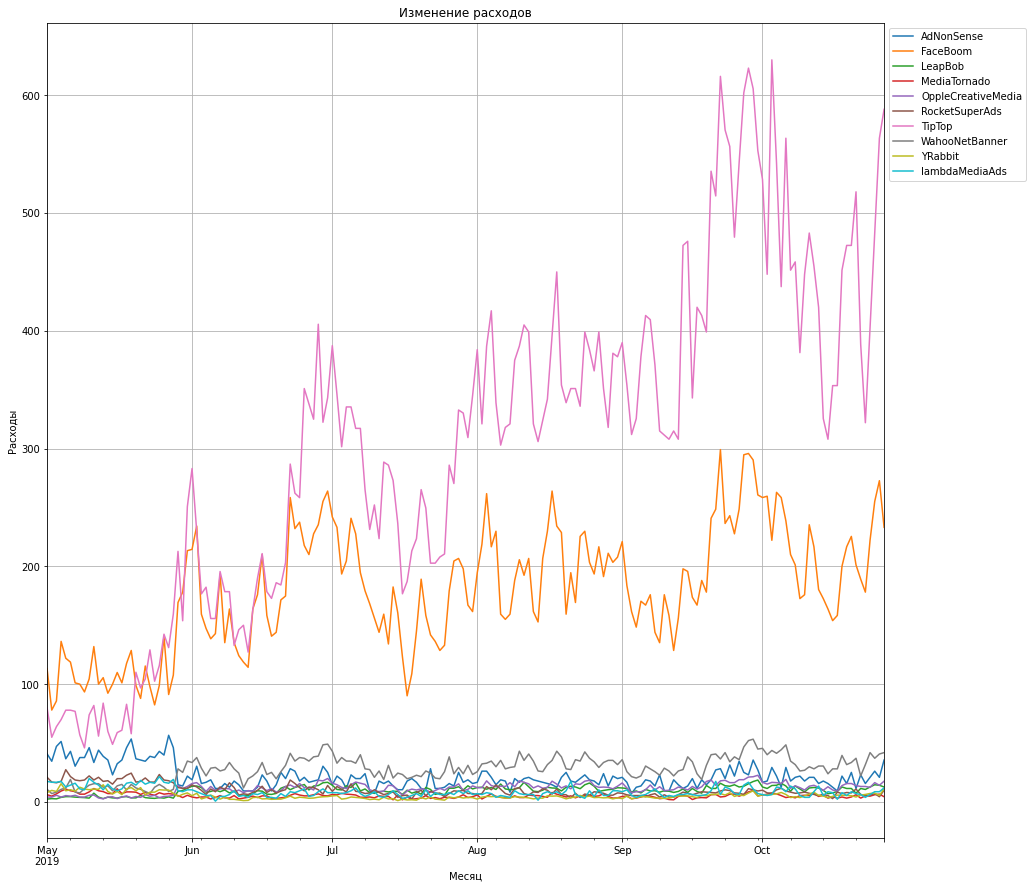

In [36]:
costs.pivot_table(
    index='dt',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 15), grid=True)

plt.title('Изменение расходов')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

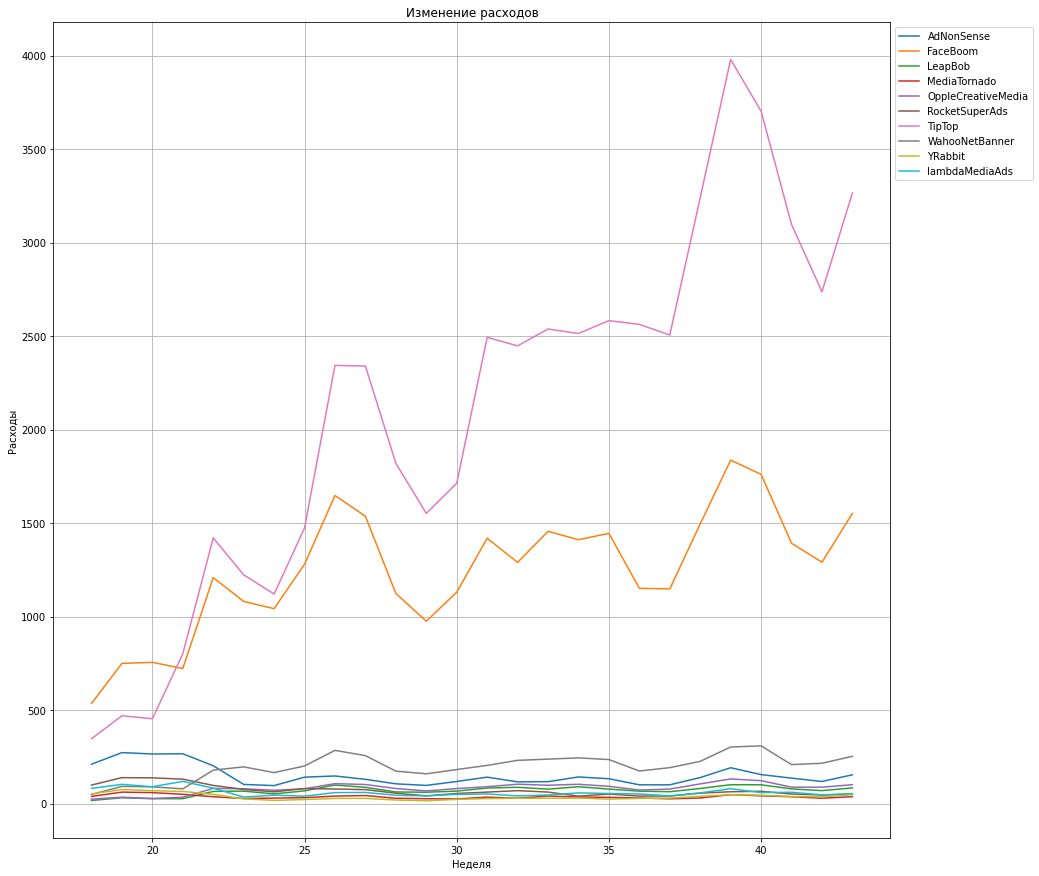

In [37]:
costs.pivot_table(
    index='week',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 15), grid=True)

plt.title('Изменение расходов')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Расходы для привлечения пользователей на площадках TipTop и FaceBoom возрастали в течение всего периода исследований. В то же время по остальным каналам уровень расходов +- оставался на прежнем уровне

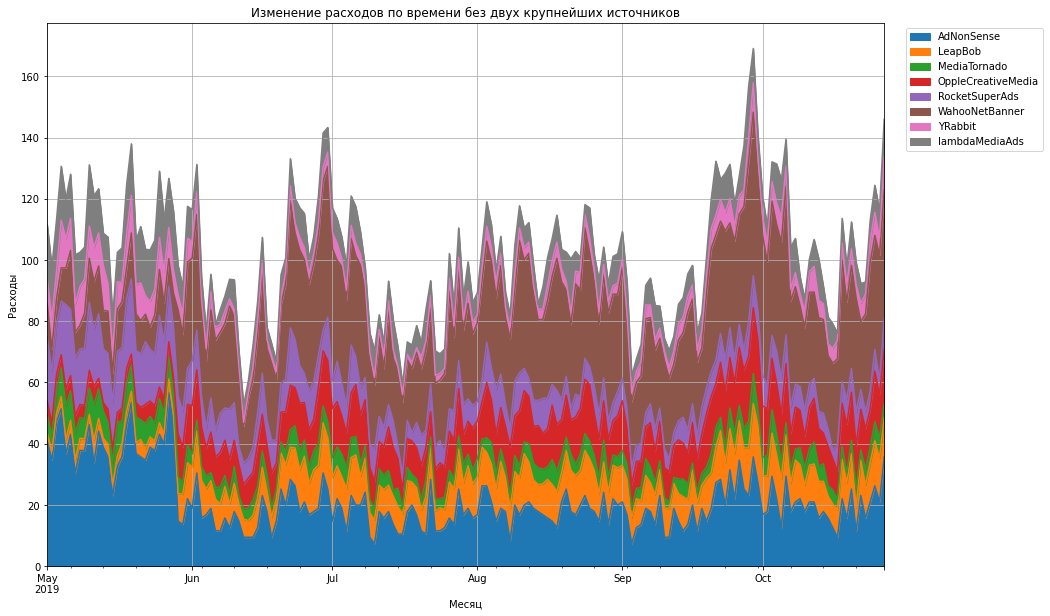

In [38]:
costs2 = costs[(costs.channel != 'FaceBoom') & (costs.channel != 'TipTop')]
costs2.pivot_table(
    index='dt', 
    columns='channel',
    values='costs',  
    aggfunc='sum',  
).plot.area(figsize=(15, 10), grid=True)

plt.title('Изменение расходов по времени без двух крупнейших источников')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0))
plt.show()

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> Исключила из графика расходы на крупнейшие каналы (tipTop и FaseBoom) и получается что уровень расходов меняется синхронно у остальных источников. Скорее всего это связано с сезонностью или выходными/будними днями

In [39]:
#сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

# находим LTV (пожизненная ценность клиента) с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# максимальная дата привлечения из сырых данных LTV
max_acquitision_dt = ltv_raw['dt'].max()
# отсекаем профили, которые «старше» этой даты
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-15,674
2019-10-16,656
2019-10-17,703


In [40]:
# средний CAC (стоимость привлечения одного клиента) по каналам привлечения
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by='cac', ascending=False)
)
round(cac, 2)

,cac
channel,
TipTop,2.76
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.73
WahooNetBanner,0.60
RocketSuperAds,0.42
OppleCreativeMedia,0.25
MediaTornado,0.22
YRabbit,0.22


<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Стоимость привлечения органических пользователей равна нулю, потому что они не были привлечены за счет рекламы. Самое дорогое привлечение пользователей из канала TipTop - 2.74, у второго по величине привлечений FaceBoom средняя стоимость привлечения клиента значительно ниже и составляет - 1,11 

In [41]:
# средний CAC по всему проекту
cac_total = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac_total, 2)

acquisition_cost    0.69
dtype: float64

In [42]:
# средний CAC по всему проекту без органических пользователей
cac_no_organic = (ltv_profiles[ltv_profiles.channel != 'organic'].agg({'acquisition_cost': 'mean'}))
round(cac_no_organic, 2)

acquisition_cost    1.12
dtype: float64

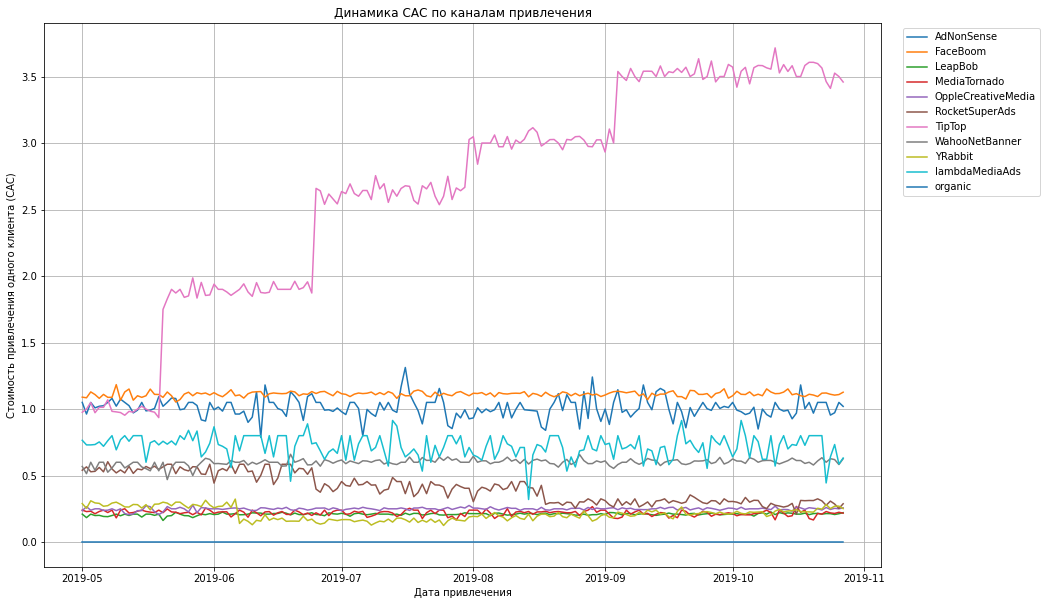

In [43]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('Стоимость привлечения одного клиента (CAC)')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>По большинству каналов расходы на протяжении всего времени были примерно одинаковыми, но платформа TipTop значительно выделяется, т.к. расходы на одного пользователя росли практически ежемесячно. средний CAC по всему проекту без органических пользователей составил 1.12

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

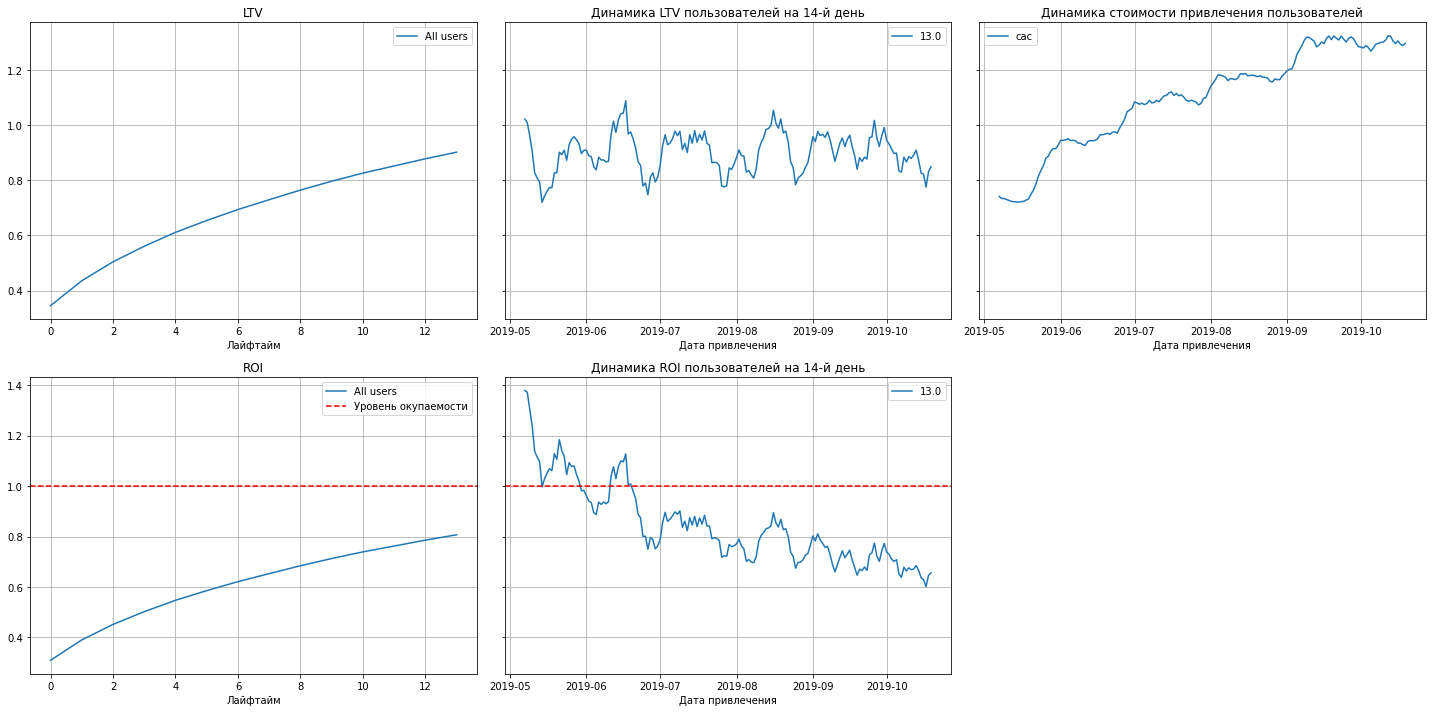

In [44]:
#окупаемость рекламы

profiles = profiles.query('channel != "organic"') #исключение органических пользоваелей

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Из графиков можно сделать вывод, что ROI находится ниже уровня окупаемости. Динамика ROI для всех пользователей на 14-й день отрицательная. Динамика стоимости привлечения пользователей постепенно увеличивалась, что мы могли наблюдать и в предыдущих исследованиях. При всем этом "пожизненная ценность" клиента (LTV) возросла.

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Анализ с разбивкой по устройствам:</b>

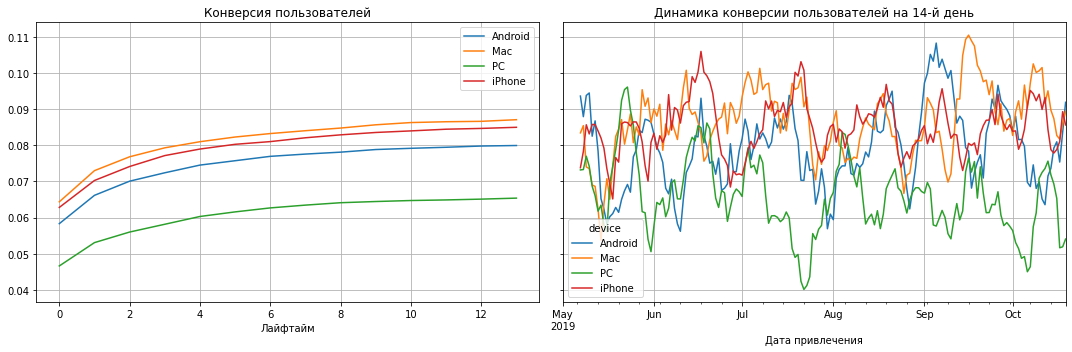

In [45]:
# конверсия с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>самая высокая конверсия у продукции Apple

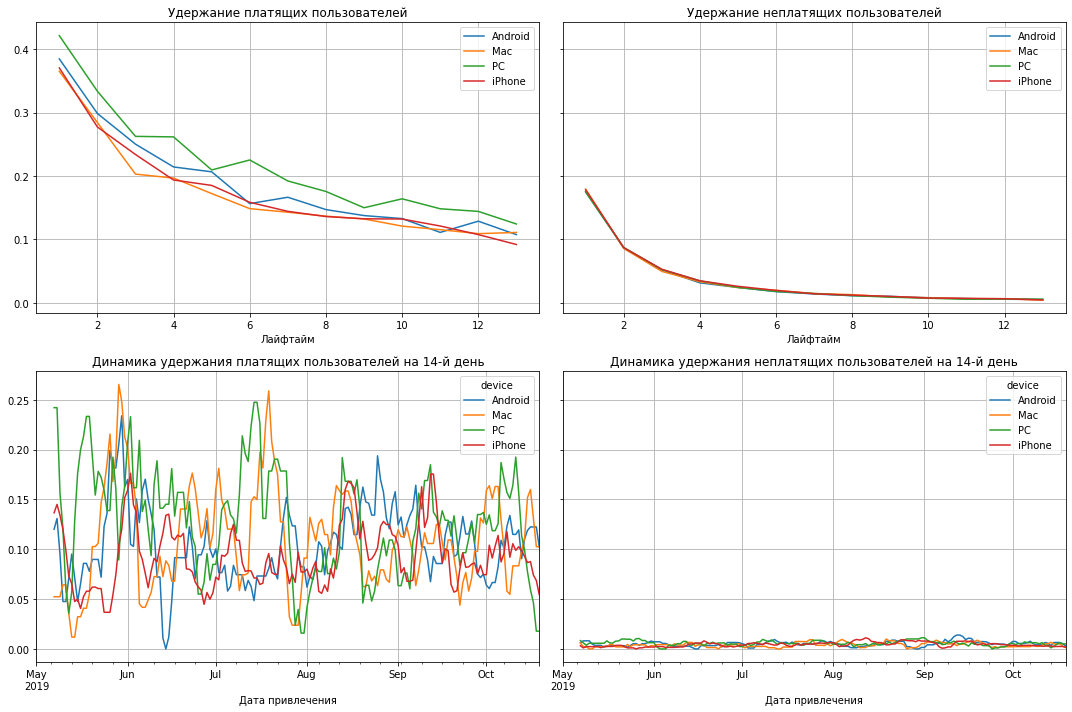

In [46]:
# удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> По удержанию платящих пользователей PC показал неплохой результат, гораздо лучше чем остальные платформы

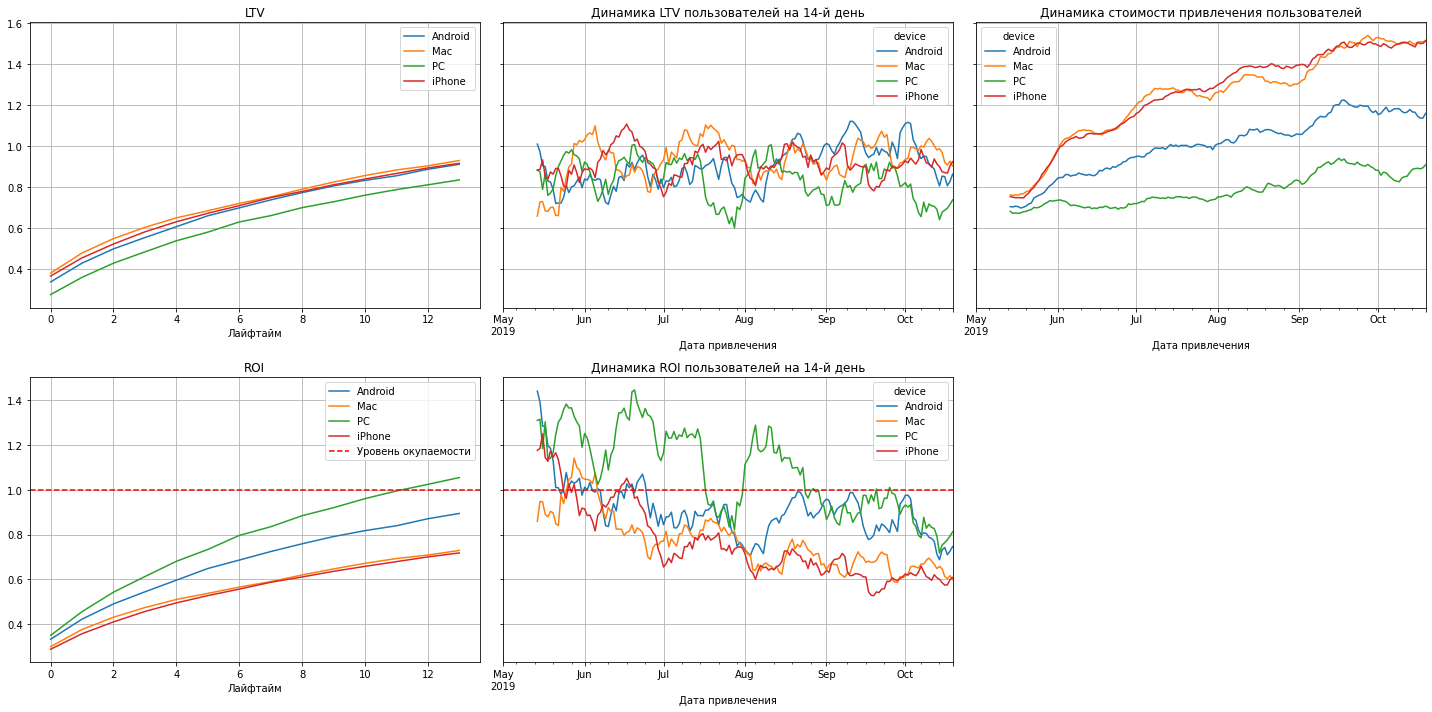

In [47]:
#Анализ окупаемости рекламы с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Пользователи PC окупаются, в отличии от остальных платформ. Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC. На графике заметно снижение динамики ROI у всех устройств при росте стоимости привлечения пользователей.

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Анализ с разбивкой по странам:</b>

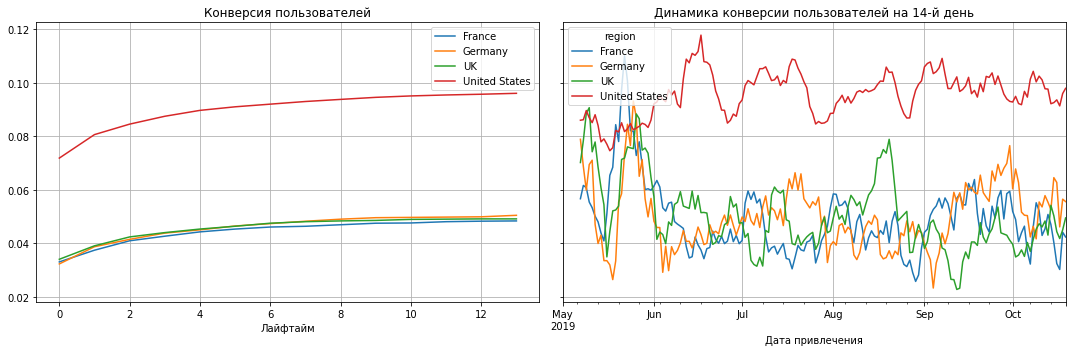

In [48]:
# конверсия с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> США - абсолютный лидер по конверсии

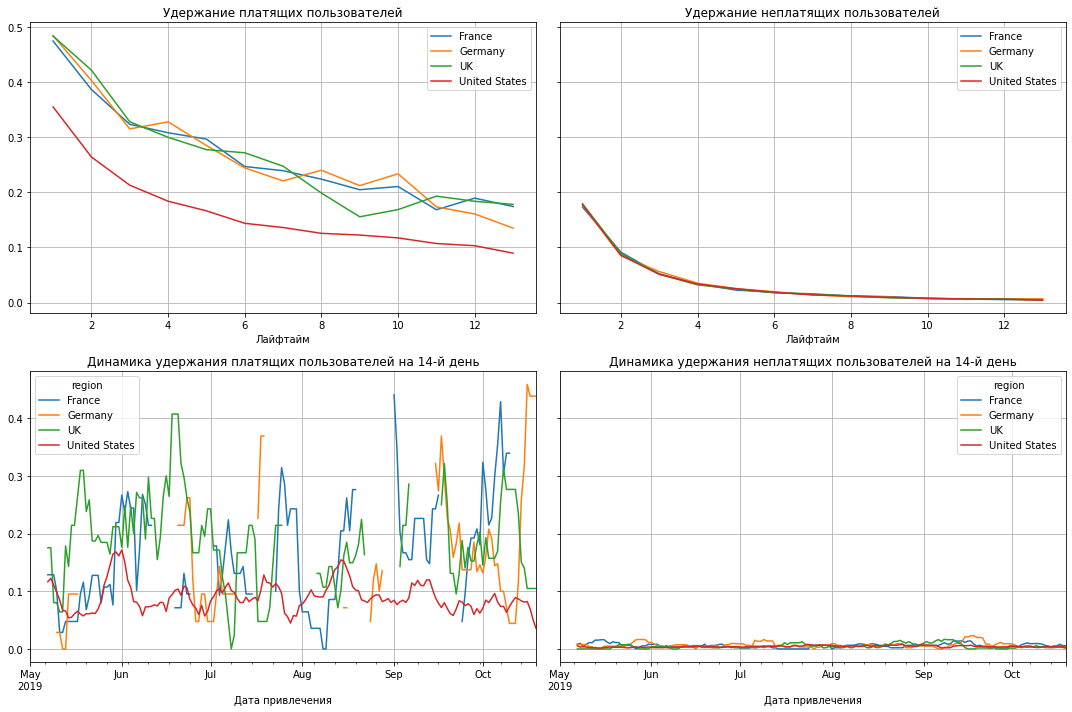

In [49]:
# удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Однако в отношении удержания пользователей США на последнем месте

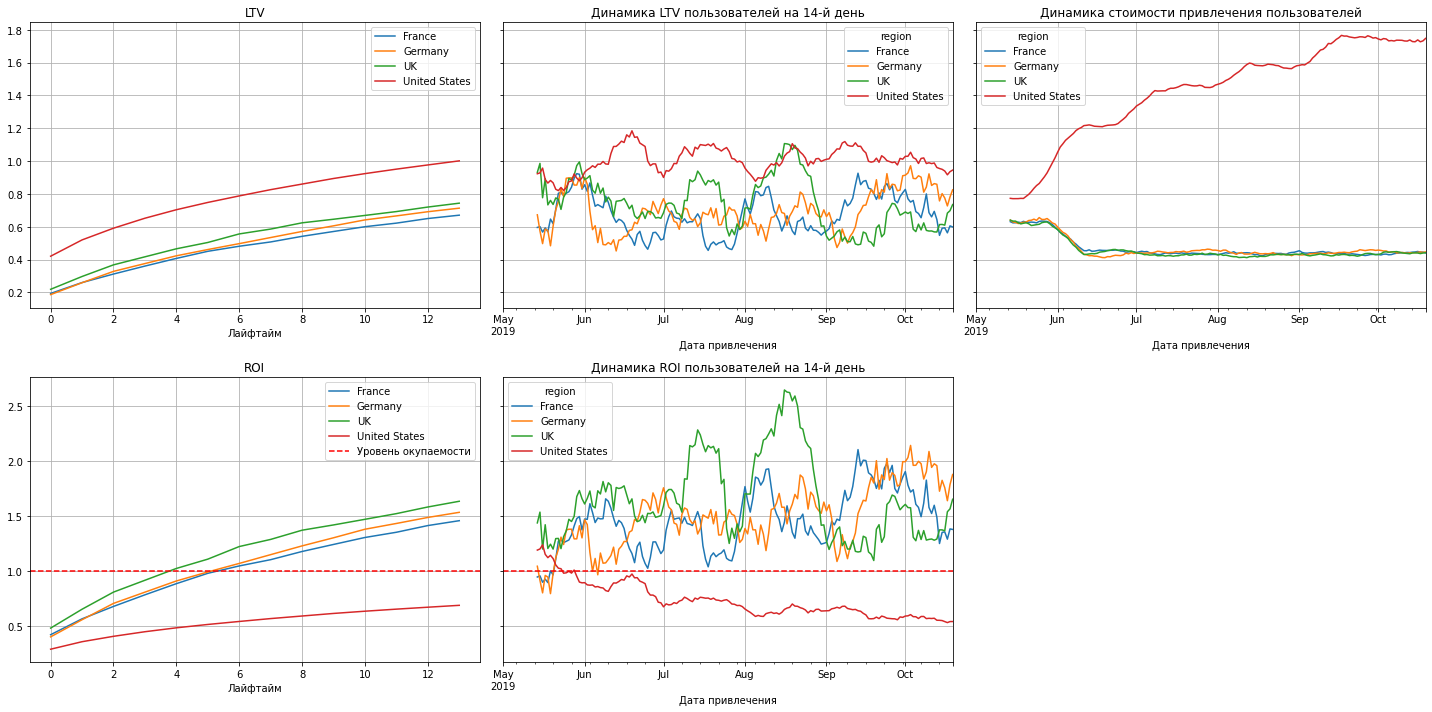

In [50]:
#анализ окупаемости рекламы с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> Реклама не окупилась только в США. Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с другими странами; стоимость в США существенно выше. Динамика окупаемости инвестиций показывает снижение окупаемости в США ниже уровня безубыточности. В то же время LTV в США выше, чем в других странах.

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Анализ с разбивкой по каналам:</b>

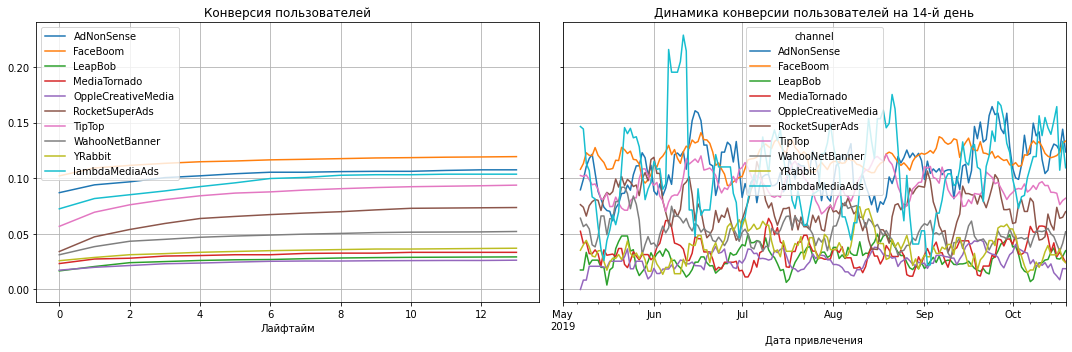

In [51]:
# конверсия с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b> Самая высокая конверсия у FaceBoom

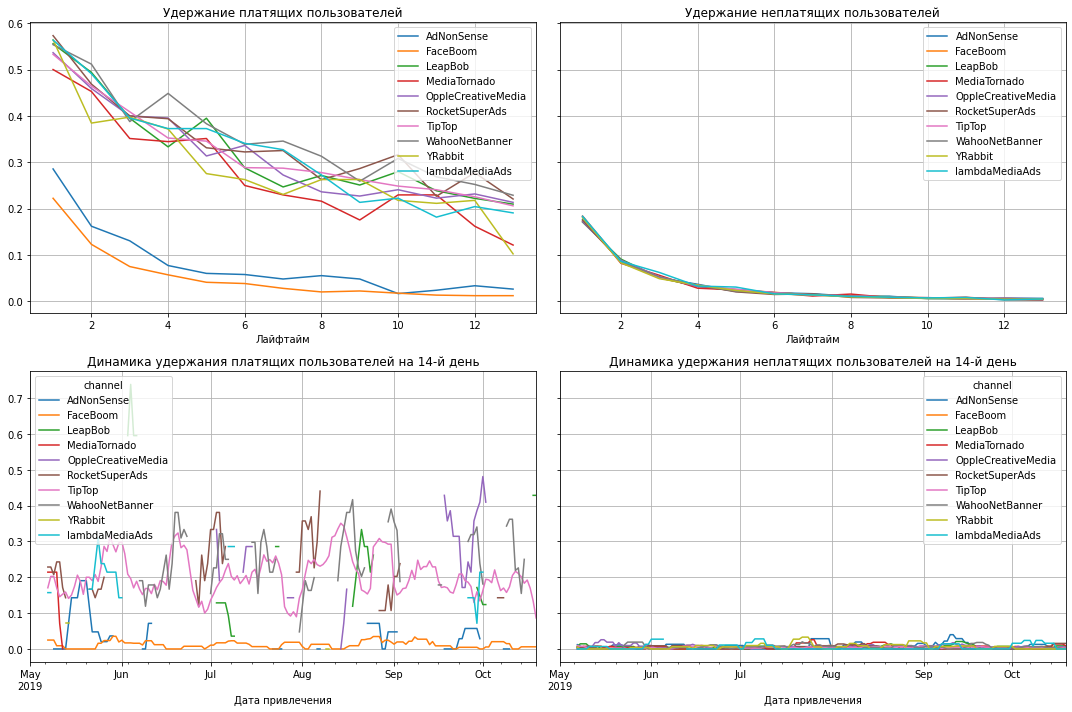

In [52]:
# удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Не смотря на хороший показатель конверсии, FaceBoom худший по удержанию. Так же плохой результат показал AdNonSense

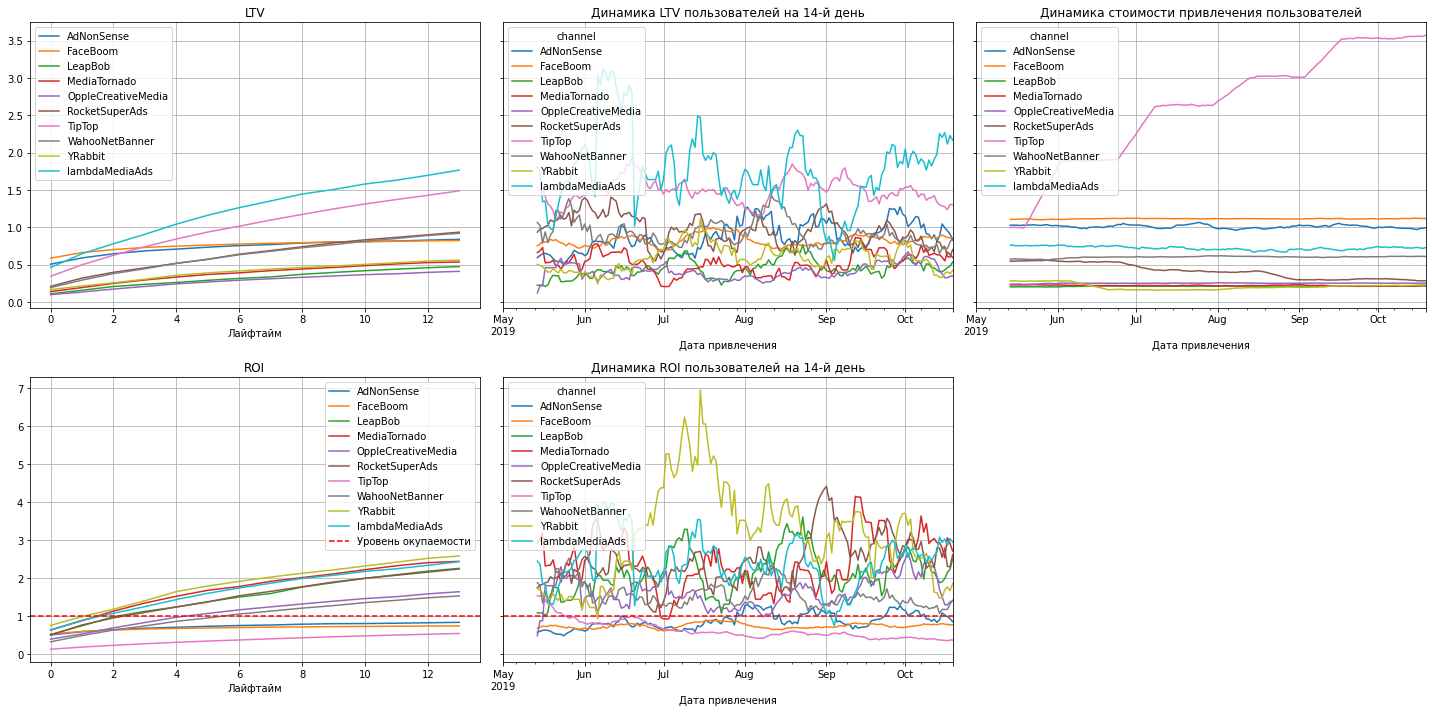

In [53]:
#анализ окупаемости рекламы с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b></b>Динамика стоимости привлечения пользователей самая высокая у канала TipTop., но в то же время эти расходы не окупились. У остальных динамика стабильная. Из 10 каналов только 3 находятся ниже уровня окупаемости, включая TipTop. Пользователи, привлечённые с каналов:  YRabbit, LambdaMediaAds, Mediatornado показали лучшие результаты по окупаемости инвестиций. Так же у LambdaMediaAds самый высокий LTV из всех.

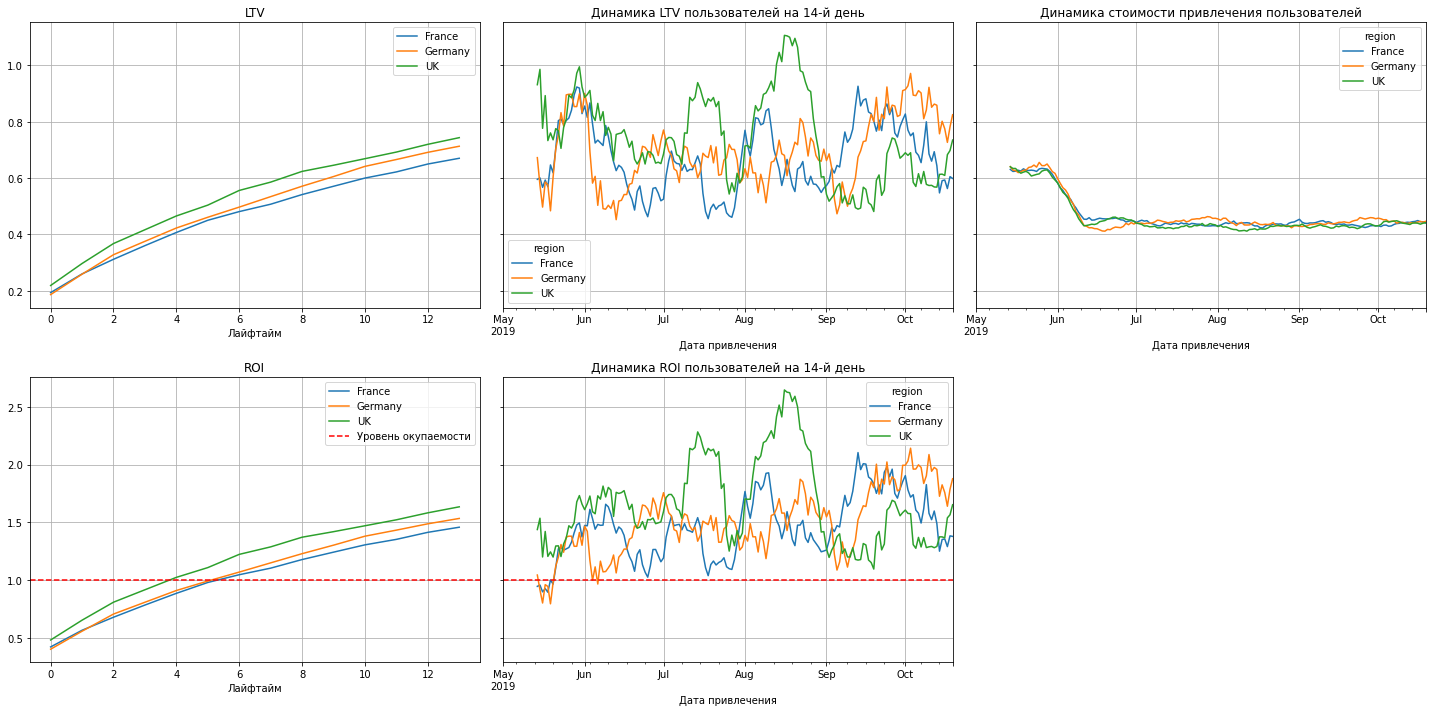

In [54]:
profiles = profiles.query('region != "United States"') #исключение пользователей США

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

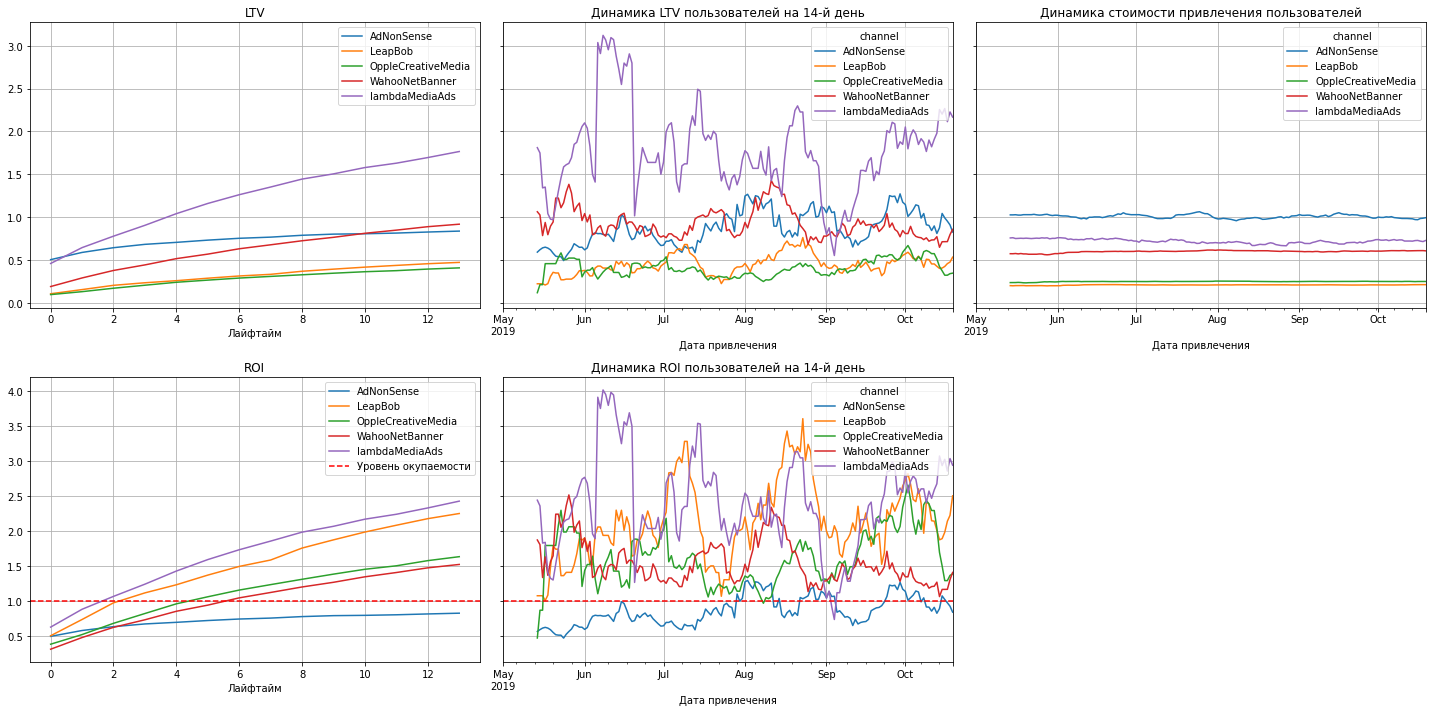

In [55]:
profiles = profiles.query('region != "United States"') #исключение пользователей США

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В европейских странах лучше всех показал себя канал LambdaMediaAds: у него самая высокая пожизненная ценность клиента и окупаемость инвестиций среди всех каналов, не смотря на достаточно высокую стоимость привлечения. Худший результат показал AdNonSense: у него самая высокая стоимость привлечения пользователей, но в то же время его ROI ниже уровня окупаемости.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>В данном проекте были исследованы данные пользователей приложения Procrastinate Pro+ по 4м странам: Франция, Германия, Великобритания и США.
Было выявлено что США имеет наибольшее количество пользователей (61,8 тыс), в том числе и платящих (9,87% против 5% по остальным странам). Однако В США пользователи всех устройств не принесли достаточно прибыли, хотя расходы на их привлечение постоянно росли.

Среди девайсов по количеству пользователей и платящих клиентов явным лидером является iPhone. Доля платящих пользователей для продуктов Apple составляет 6,21-6,36 %, следующий в рейтинге Android с 5,85% и замыкает список PC с 5,05%.
Так же у iPhone самая высокая конверсия, но самый лучший результат по удержанию платящих пользователей показал PC. Пользователи PC окупаются, в отличии от остальных платформ. Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC. 

Общая сумма расходов на маркетинг составила 105497.3 
Наибольше расходы составили на канал TipTop - 54 751,3 и FaceBoom - 32 445,6 На остальные каналы было израсходовано значительно меньше. Расходы для привлечения пользователей на площадках TipTop и FaceBoom возрастали в течение всего периода исследований. Самое дорогое привлечение пользователей из канала TipTop - 2.74, у второго по величине привлечений FaceBoom средняя стоимость привлечения клиента значительно ниже и составляет - 1,11.
По большинству каналов расходы на протяжении всего времени были примерно одинаковыми, но платформа TipTop значительно выделяется, т.к. расходы на одного пользователя росли практически ежемесячно.

Самая высокая конверсия у FaceBoom. Не смотря на хороший показатель конверсии, FaceBoom худший по удержанию. Так же плохой результат показал AdNonSense. Динамика стоимости привлечения пользователей самая высокая у канала TipTop., но в то же время эти расходы не окупились. Инвестиции в рекламу не окупились у AdNonSense, FaceBoom, TipTop.
У остальных динамика стабильная. Из 10 каналов только 3 находятся ниже уровня окупаемости, включая TipTop. Пользователи, привлечённые с каналов: YRabbit, LambdaMediaAds, Mediatornado показали лучшие результаты по окупаемости инвестиций. Так же у LambdaMediaAds самый высокий LTV из всех.
    


В целом, реклама на привлечение пользователей не окупилась. При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. 

Отделу маркетинга рекомендуется:
    - обратить внимание на финансирование на маркетинг там, где стоимость привлечения слишком большая - это расходы на пользователей из США и каналы AdNonSense, FaceBoom, TipTop, инвестиции по которым не окупились. 
    - в европейских странах лучше всех показал себя канал LambdaMediaAds: у него самая высокая пожизненная ценность клиента и окупаемость инвестиций среди всех каналов, не смотря на достаточно высокую стоимость привлечения. Худший результат показал AdNonSense: у него самая высокая стоимость привлечения пользователей, но в то же время его ROI ниже уровня окупаемости - здесь стоит обратить внимание на финансирование этого канала. 
    - проработать канал LeapBob - у него очень высокая окупаемость при самой низкой стоимости привлечения пользователей, однако достаточно низкая LTV, над ней нужно поработать. 
    -обратить отдельное внимание на привлечение пользователей ПК, они показывают достаточно высокую окупаемость инвестиций при самой низкой среди всех стоимости привлечения.
    - в США пользователи всех устройств не принесли достаточно прибыли, хотя расходы на их привлечение постоянно росли, что также стоит учесть при принятии финансовых решений, целесообразны ли траты в таком объеме. 
    
    Для увеличения удержания клиентов:
    - рассмотреть варианты включения напоминаний о наличии неоплаченных товаров в корзине,
    - низкое удержание наблюдается на платформах AdNonSense, FaceBoom. Стоит проверить наличие технических ошибок
    
Конверсия европейских пользователей гораздо ниже чем в США, стоит проверить наличие технических ошибок или особенностей интерфейса, отталкивающих пользователей</b>